In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [54]:
# style params for the plots
plt.rc('font', size=20)          # text size
plt.rc('axes', titlesize=26)     # axes title size
plt.rc('axes', labelsize=24)     # axes label size
plt.rc('xtick', labelsize=20)    # x-tick label size
plt.rc('ytick', labelsize=20)    # y-tick label size
plt.rc('legend', fontsize=20)    # legend font size
plt.rc('figure', titlesize=26)   # figure title size

In [46]:
#def error(freq_data, mag_data, phase_data, total_samples=200): # calculates error   
#    quant_error_mag = V_range/(2**n) 
#    
#    log_freq_data = np.log10(freq_data)
#    freq_range = np.max(log_freq_data) - np.min(log_freq_data) 
#    quant_error_freq = freq_range/(2**n)  
#    
#    quant_error_phase = 360/(2**n)
    
#    std_error_mag = np.std(mag_data)/np.sqrt(total_samples) 
#    std_error_freq_log = np.std(log_freq_data)/np.sqrt(total_samples)
#    std_error_freq = std_error_freq_log*np.mean(freq_data)/(np.log(10)*np.sqrt(total_samples)) 
#    std_error_phase = np.std(phase_data)/np.sqrt(total_samples)
#    
#    total_error_mag = np.sqrt(quant_error_mag**2 + std_error_mag**2)
#    total_error_freq = np.sqrt(quant_error_freq**2 + std_error_freq**2)
#    total_error_phase = np.sqrt(quant_error_phase**2 + std_error_phase**2)
#    
#    return quant_error_mag, std_error_mag, total_error_mag, quant_error_freq, std_error_freq, total_error_freq, quant_error_phase, std_error_phase, total_error_phase

def extract_data(folder): # get data
    data_dict = {}
    
    for filename in os.listdir(folder):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder, filename)
            
            try:
                data = np.genfromtxt(file_path, delimiter=',', skip_header=8, usecols=(1, 2, 3))
                
                file_key = os.path.splitext(filename)[0]
                freq_var = f'{file_key}_freq_data'
                ch1_amp_var = f'{file_key}_ch1_amp_data'
                ch2_amp_var = f'{file_key}_ch2_amp_data'
                
                freq_data = data[:, 0]
                ch1_amp_data = data[:, 1]
                ch2_amp_data = data[:, 2]
                
                data_dict[freq_var] = freq_data
                data_dict[ch1_amp_var] = ch1_amp_data
                data_dict[ch2_amp_var] = ch2_amp_data
                
            except Exception as e:
                print(f'Error reading {filename}: {e}')
                
    return data_dict

def numeric_value_from_label(label): # used to put labels in numerical order in legends
    match = re.search(r'\d+', label)
    return float(match.group()) if match else None

folder = 'Data/4a' 
data = extract_data(folder)

  
data_headers = ['NoLoad244point4Hz', 'NoLoad488point28Hz', 'NoLoad61point04Hz', 
                'Part2aDataResBW122Point07Hz', 'Part2aDataResBW244Point14Hz', 
                'Part2aDataResBW488Point28Hz', 'Part2aDataResBW61Point04Hz',
                'Part2aDataResBW7Point8Hz_highest_res']

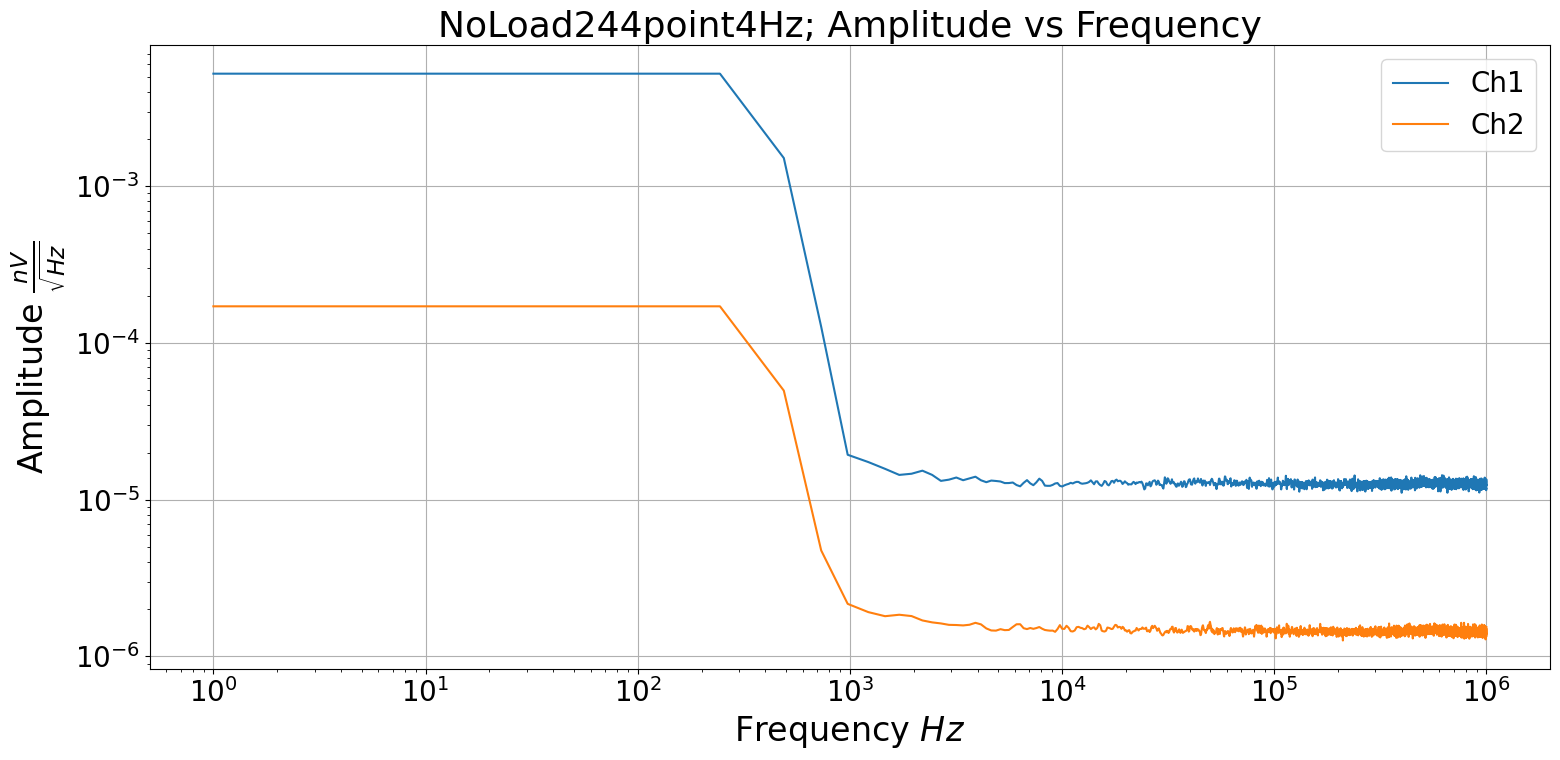

In [93]:
skip = 0
data_header = data_headers[0] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

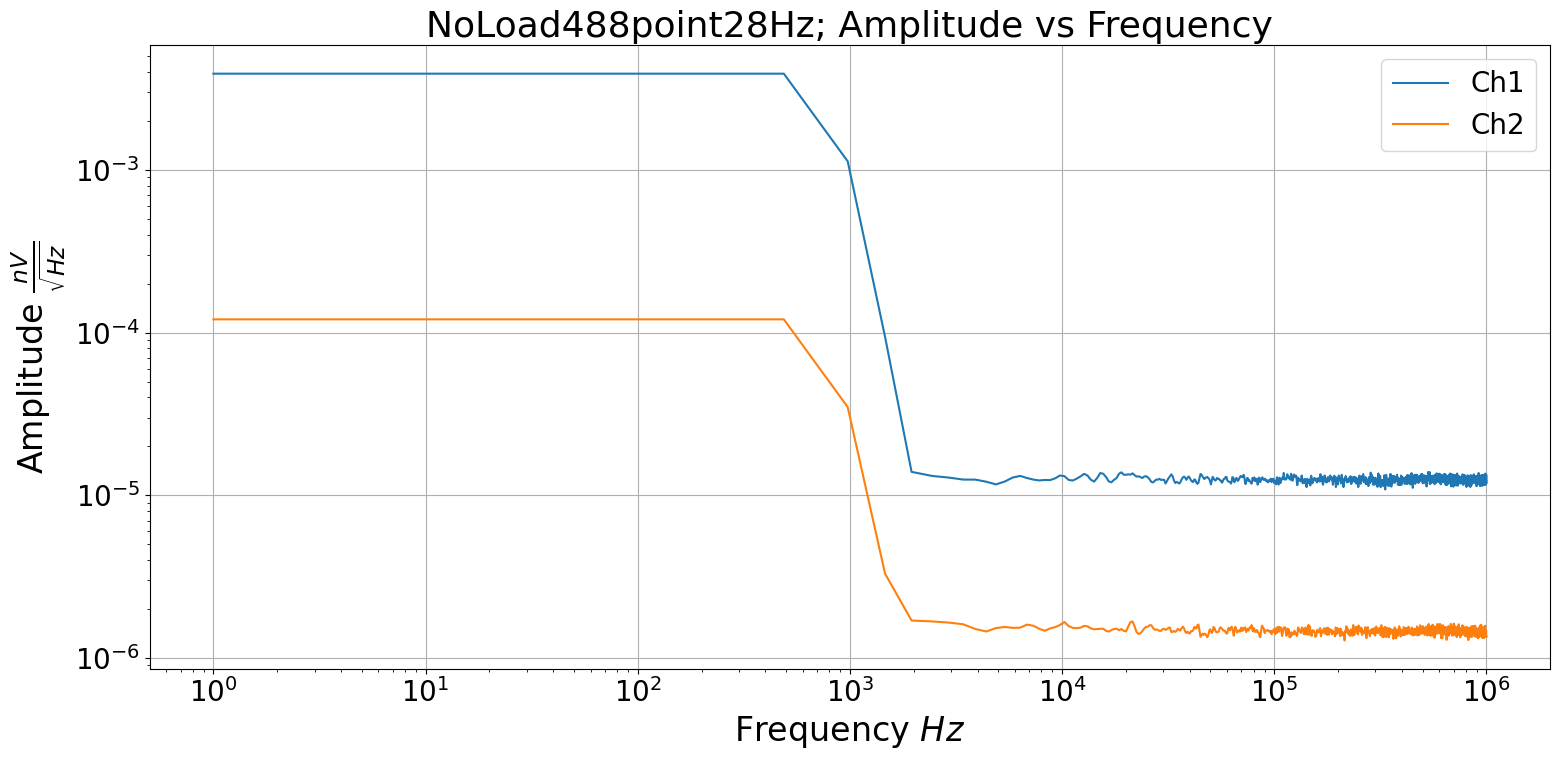

In [94]:
skip = 0
data_header = data_headers[1] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

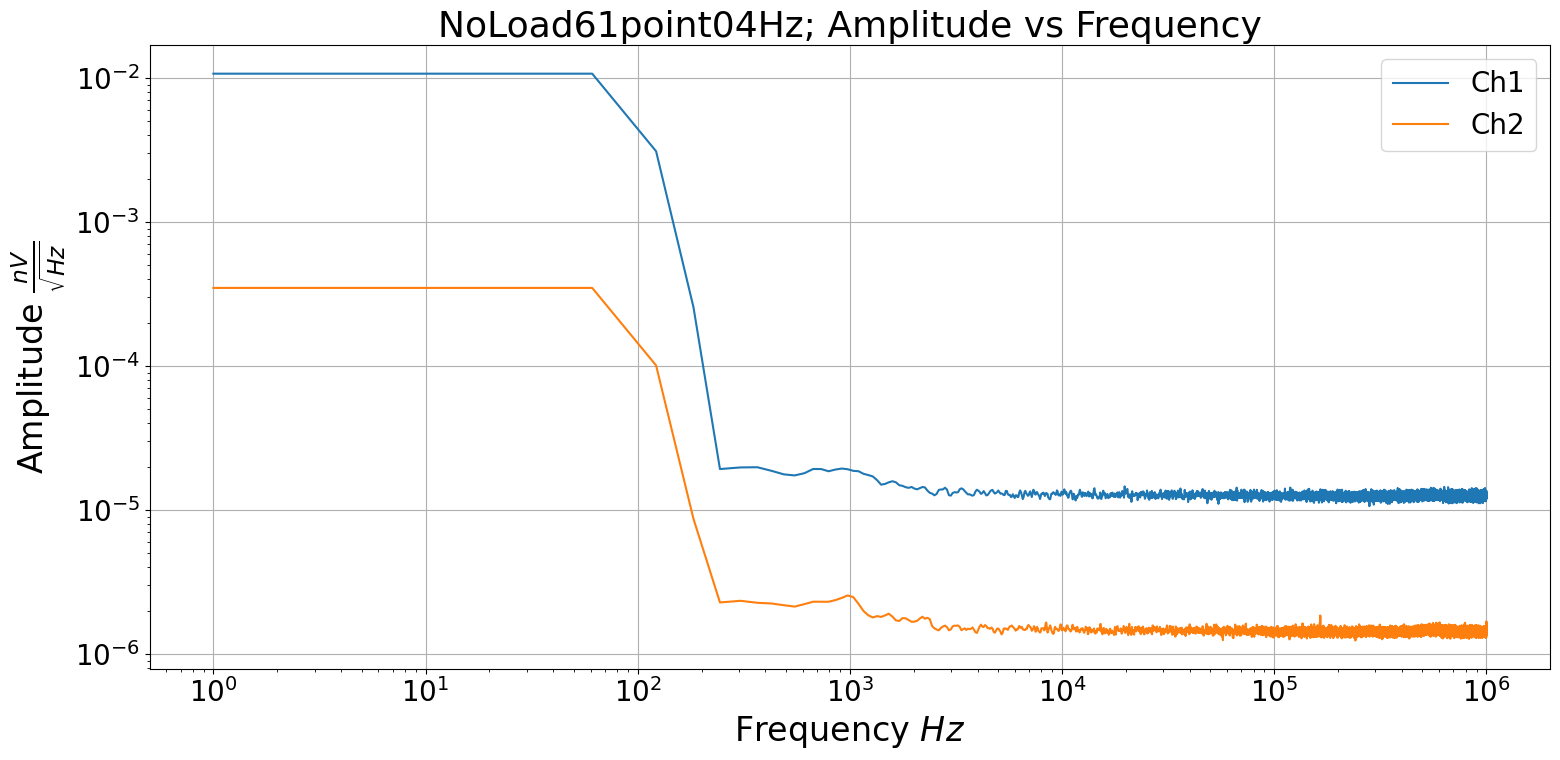

In [95]:
skip = 0
data_header = data_headers[2] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

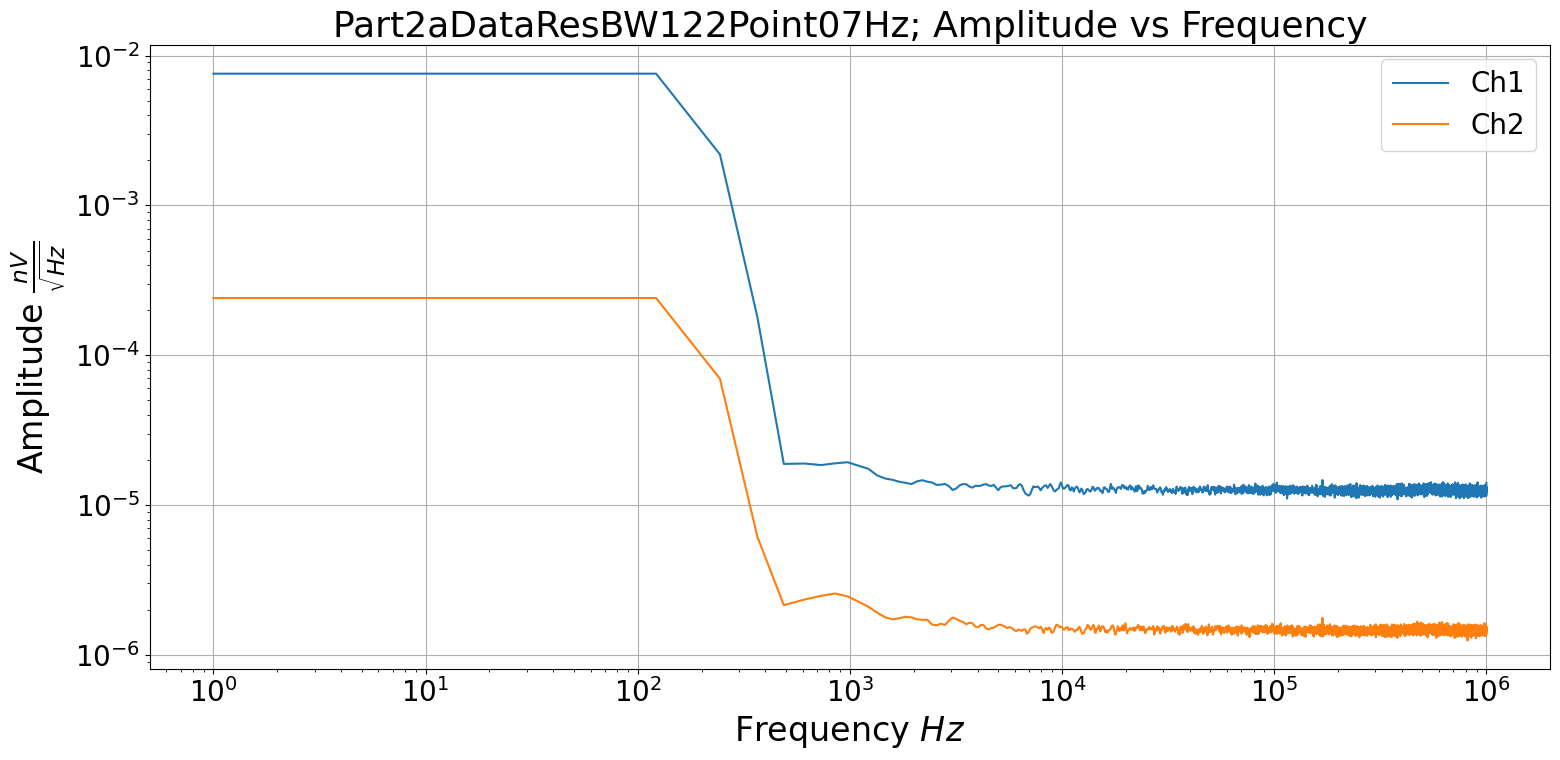

In [96]:
skip = 0
data_header = data_headers[3] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

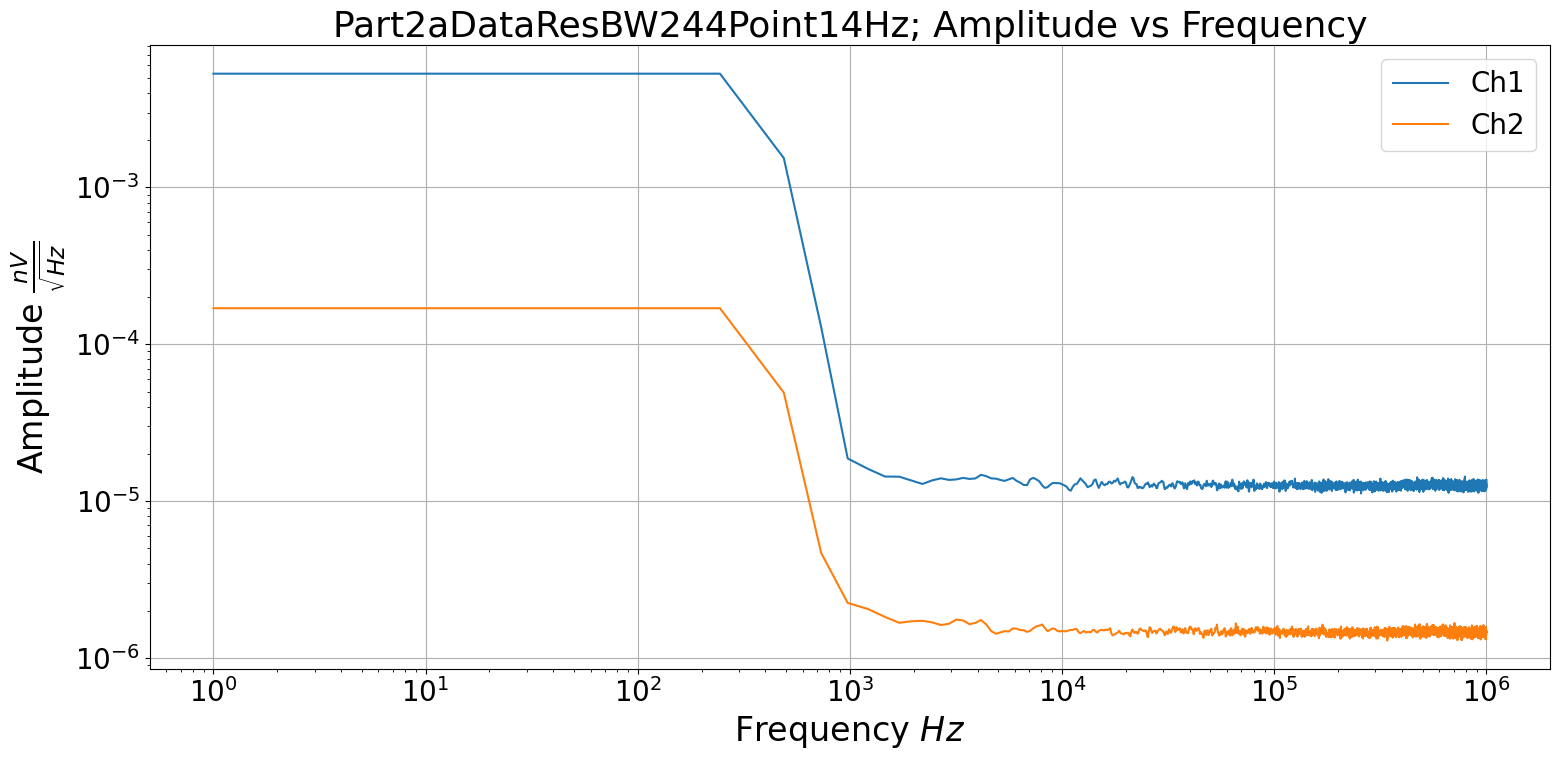

In [97]:
skip = 0
data_header = data_headers[4] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

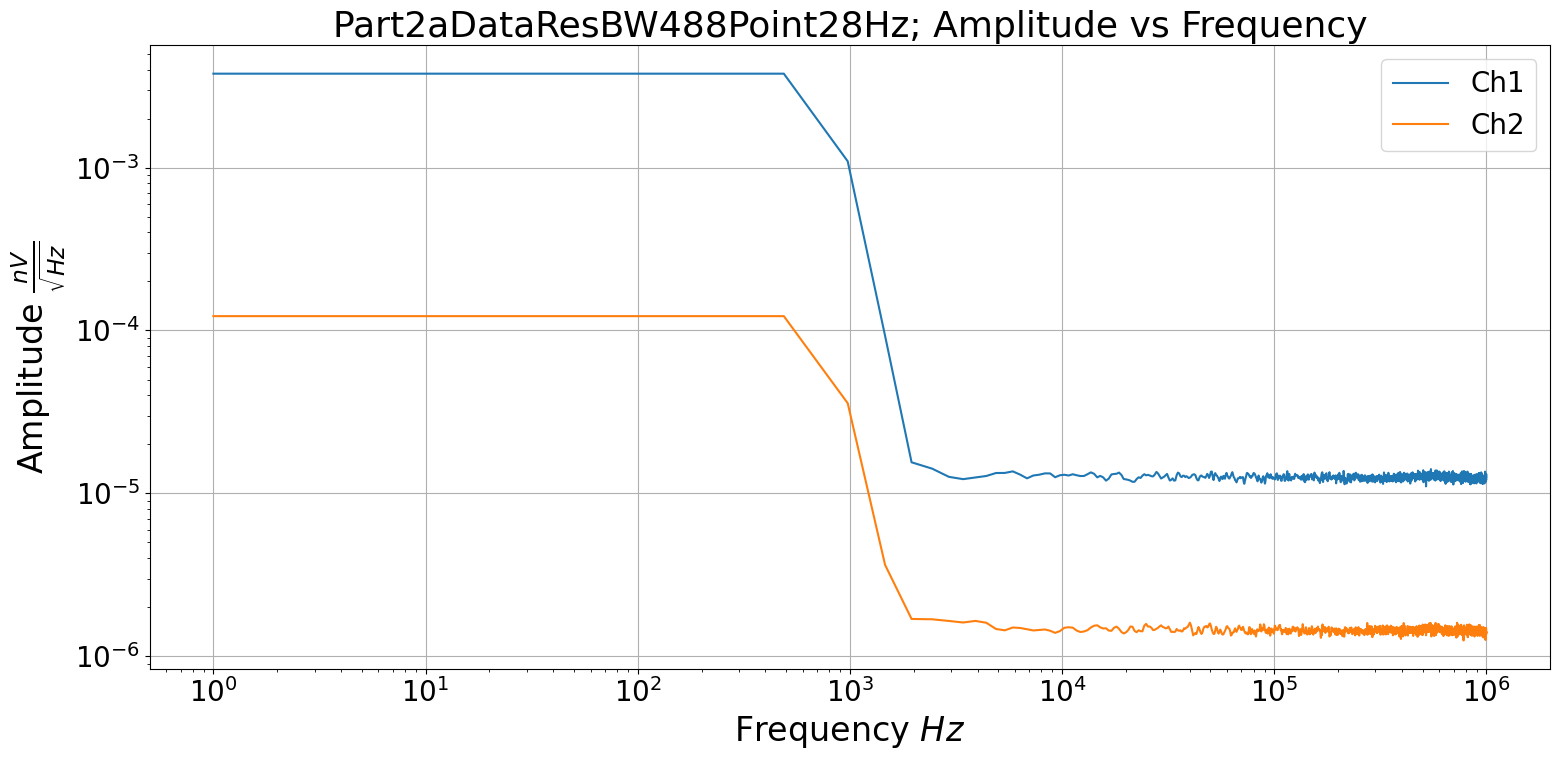

In [100]:
skip = 0
data_header = data_headers[5] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

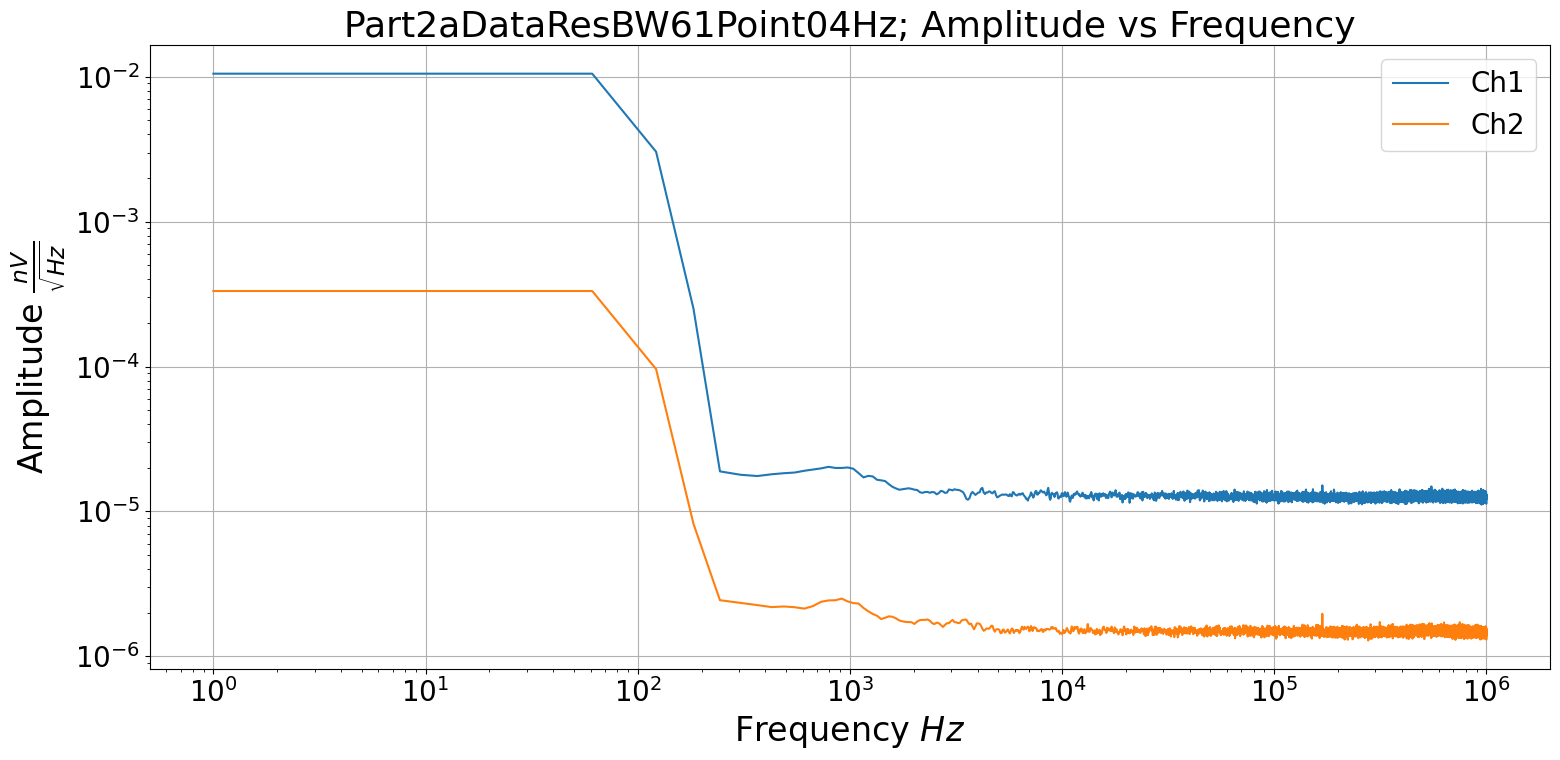

In [98]:
skip = 0
data_header = data_headers[6] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

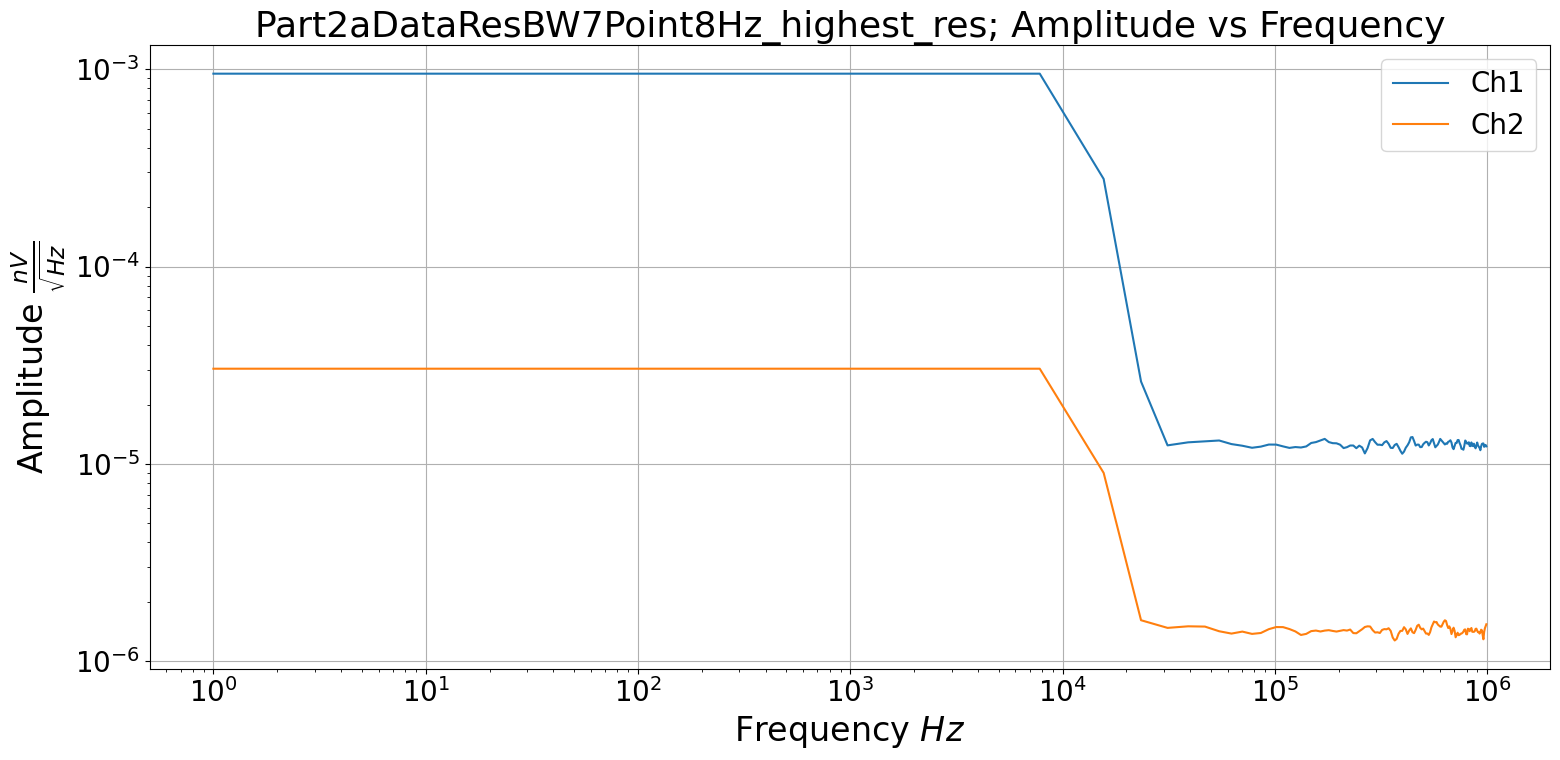

In [99]:
skip = 0
data_header = data_headers[7] 
title = data_header
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Corner Frequency for label : 305.18 Hz
White Noise Level for label : 1.26e-05 nV/√Hz


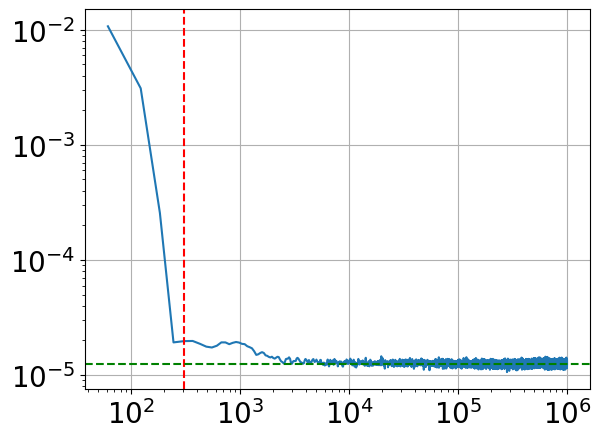

In [74]:
# an attempt to find the values for the corner frequency and white noise
# I think this needs more work
corner_frequencies = []
white_noise_levels = []

for entry in entries:
    freq_data = np.array(entry['freq_data'])
    ch1_amp_data = np.array(entry['ch1_amp_data'])
    
    log_freq = np.log(freq_data)
    log_amp = np.log(ch1_amp_data)

    slope = np.gradient(log_amp, log_freq)

    corner_index = np.where(np.abs(slope) < 0.1)[0][0]  

    corner_frequency = freq_data[corner_index]
    white_noise_level = ch1_amp_data[corner_index:].mean()

    corner_frequencies.append(corner_frequency)
    white_noise_levels.append(white_noise_level)

    print(f"Corner Frequency for label {entry['label']}: {corner_frequency:.2f} Hz")
    print(f"White Noise Level for label {entry['label']}: {white_noise_level:.2e} nV/√Hz")
    plt.plot(entry['freq_data'], entry['ch1_amp_data'])
    plt.axvline(corner_frequency, color='red', linestyle='--', label=f"Corner Frequency ~{corner_frequency:.2f} Hz")

average_white_noise_level = np.mean(white_noise_levels)
plt.axhline(average_white_noise_level, color='green', linestyle='--', label="White Noise Level")

#plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()
